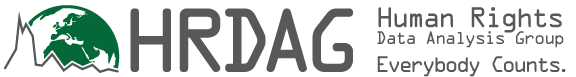

In [53]:
from IPython.display import Image
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from ast import literal_eval


Image(filename='../data/banner.png')

## Intro

In the previous chapter of this series, we explored the application of large language models (LLMs) for structured information extraction from wrongful conviction case files using traditional retrieval augmented generation (RAG). However, recent advancements in LLM technology have necessitated a re-evaluation of our information extraction pipeline. Models like Gemini 1.5 Pro with its one million token context window and Claude 3 with a 200k context window now allow entire documents to fit within a single context window, potentially eliminating the need for retrieving specific document pages. Furthermore, the emergence of cost-effective yet high-performing models like Claude Haiku has transformed our methodology. Unlike our initial evaluations, it is now feasible to iterate over every single page in a document, rather than attempting to extract only the most relevant pieces for analysis. This shift allows for a more comprehensive examination of the entire document, potentially uncovering insights that might have been missed in a more selective approach.

This follow-up chapter aims to reconsider the fundamentals of our information extraction pipeline and explore the impact of these larger models on our research. Our approach—evaluating LLMs in legal research by focusing on entity extraction—aligns with recent computational law research suggesting that AI might be more effective in narrow, well-defined legal applications [1]. By concentrating on the specific task of identifying police officers in misconduct documents, we can assess LLM performance in a practical legal context while developing techniques that can extend to other entities (e.g., witnesses, victims, locations, evidence, legal precedents) and legal document types.

In the following sections, we present our evaluations of various entity extraction techniques using both proprietary Claude models and the open-source Mixtral model, which can be deployed on private endpoints for sensitive documents. Our analysis compares different approaches, including full-context processing, named entity recognition (NER) based methods, and page-by-page analysis, to determine the most effective and efficient strategies for entity extraction in legal documents.

## Evaluations

We conducted a comparative analysis of entity extraction techniques using both proprietary Claude models and the open-source Mixtral model.
We evaluated three distinct extraction techniques:

1. **All Context**: This approach processes the entire document at once, utilizing the full context window capabilities of Claude 3 Sonnet, Claude 3 Haiku, and Claude 3 Opus.

2. **All Pages**: This technique iterates over each page in the document sequentially. We applied this method using Claude 3 Haiku, Claude 3.5 Sonnet, and Mixtral models (7B and 22B variants).

3. **Named Entity Recognition (NER) Based**: This method preprocesses the document to identify pages with the highest concentration of entities, then analyzes these high-density areas. We tested this approach with varying percentages (25%, 50%, and 75%) of the most entity-rich pages using Claude 3 Haiku, Claude 3.5 Sonnet, and Mixtral models (7B and 22B variants).

### Results

1. **All Pages Approach**:
   - Claude 3.5 Sonnet performed best, with a score of 0.938840.
   - Claude 3 Haiku followed closely with 0.912932.
   - Mixtral models, while scoring lower, showed promising results:
     - Mixtral 7B achieved 0.786638
     - Mixtral 22B scored 0.729260
   
2. **NER-Based Approach**:
   - A clear trend emerged: performance improved as the percentage of analyzed pages increased:
     - For Claude 3.5 Sonnet:
       - 25% of pages: 0.786434
       - 50% of pages: 0.896382
       - 75% of pages: 0.931097
     - Similarly for Claude 3 Haiku:
       - 25% of pages: 0.738128
       - 50% of pages: 0.847949
       - 75% of pages: 0.875217
   - Mixtral models followed the same pattern, though with lower overall scores:
     - Mixtral 7B:
       - 25% of pages: 0.593477
       - 50% of pages: 0.729663
       - 75% of pages: 0.748019
     - Mixtral 22B:
       - 25% of pages: 0.616207
       - 50% of pages: 0.701467
       - 75% of pages: 0.716072
   
3. **Full Context Approach**:
   - This method yielded the lowest scores across all models:
     - Claude 3 Haiku: 0.607521
     - Claude 3 Opus: 0.671461
     - Claude 3.5 Sonnet: 0.520698

### Insights

Based on the results, the all pages analysis approach consistently outperformed other methods across all tested models. The full context approach, despite its theoretical potential, demonstrated significant limitations in practice. This is likely due to the many known issues associated with use of the full context window [2], including degraded retrieval performance with increasing context length, impaired reasoning capabilities over multiple facts, and susceptibility to information overload. Given that the NER-based approaches are essentially derivatives of the all pages method, and considering the superior performance of the all pages models, the rest of this post will focus exclusively on this most effective approach.

While the Mixtral models scored lower than their Claude counterparts, their performance is notably impressive considering their unique advantages. The Mixtral 7B model achieved a score of 0.786638, and the larger Mixtral 22B scored 0.729260 in the all pages approach. These scores are particularly significant given that Mixtral models can be run locally on consumer hardware, eliminating the need for cloud-based API calls. This local execution capability not only makes them cost-effective - as they can be used without incurring API fees - but also opens up possibilities for processing sensitive or confidential data that cannot leave the user's computer due to privacy or security concerns. The ability to achieve such competitive results with these additional benefits makes Mixtral models a compelling option for certain use cases, especially when considering the trade-off between performance and data privacy.

While the Mixtral models offer unique advantages in terms of local execution and data privacy, the Claude family demonstrated even more impressive performance in entity recognition tasks. In particular, Claude 3 Haiku achieved an outstanding overall accuracy of 0.912 (or 212 out of 232 entities correctly identified). To put this performance into perspective, let's examine a specific case study involving a 175-page document. Claude 3 Haiku correctly identified 31 out of 33 entities (police officers) in a 175-page transcript document. The total cost for this operation using Haiku was just $0.1275, significantly lower than its counterparts in the Claude 3 family. For comparison, the same task would have cost $1.53 with Claude 3.5 Sonnet and $7.65 with Claude 3 Opus.

To put this in perspective, a human performing the same task would take approximately 5 hours, assuming an average reading speed of 225 words per minute and additional time for entity identification. At a rate of $30 per hour, the human labor cost would be around $150. This stark contrast—5 hours and $150 for a human versus near-instantaneous processing and $0.1275 for Claude 3 Haiku—underscores the remarkable efficiency and cost-effectiveness of AI in such tasks. The AI not only completes the job in seconds at a fraction of the cost but also maintains high accuracy. This analysis highlights Haiku's position as not just the most cost-effective option in the Claude 3 family, but also as a powerful tool for dramatically increasing productivity and reducing costs in tasks involving large-scale document analysis and entity recognition. (Need to be clear that labor costs in terms of dollars are only relevant for the comparative analysis that we're making when discussing the advantages of Haiku/Mixtral. Ultimately, whats most relevant are the improvements in how an individual's time can be allocated. Away with the menial work.)

# Analysis

In our evaluation of the all pages approach, we focused on comparing the performance of Claude models (Haiku and Sonnet) with Mixtral models (7B and 22B) in extracting different types of entities. This analysis provides insights into how these models handle single-word and multi-word entities, which is crucial for understanding their effectiveness in real-world document processing tasks.

# Entity Complexity Observations

1. **Claude Models Performance**:
   - Claude 3.5 Sonnet showed the best overall performance, with the lowest percentage of unmatched single-word entities (18.18%) and a very low percentage of unmatched multi-word entities (5.08%).
   - Claude 3 Haiku performed similarly well, with slightly higher unmatched percentages (21.82% for single-word and 4.52% for multi-word entities).

2. **Mixtral Models Performance**:
   - Both Mixtral models showed higher percentages of unmatched entities compared to the Claude models.
   - Mixtral 7B performed better than Mixtral 22B, particularly in multi-word entity extraction.
   - Mixtral 22B had the highest percentage of unmatched entities for both single-word (36.36%) and multi-word (22.60%) categories.

3. **Single-Word vs. Multi-Word Entity Extraction**:
   - All models generally performed better in extracting multi-word entities compared to single-word entities, as evidenced by the lower percentage of unmatched multi-word entities across all models.
   - This trend was particularly pronounced in the Claude models, which showed a significant performance gap between single-word and multi-word entity extraction.

4. **Model Size and Performance**:
   - Interestingly, the larger Mixtral 22B model underperformed compared to its smaller 7B counterpart. This suggests that larger model size doesn't always correlate with better performance in specific tasks like entity extraction.
   - In contrast, the more advanced Claude 3.5 Sonnet outperformed Claude 3 Haiku, albeit by a small margin.


# Feature Importance Observations

1. Haiku Model Analysis Summary
For report documents, the Haiku model has a high R² score of 0.8812, indicating reliable predictions. The most important features are average entity length (0.4420) and percent single-word entities (0.3603), both above the absolute threshold of 0.333 and significantly contributing to the model's performance. Percent multi-word entities (0.1976) is below the threshold and therefore considered less important. For transcript documents, the low R² score (0.3643) suggests that the feature importances may be less reliable, so further model improvement is necessary before drawing conclusions about feature significance.

2. Sonnet Model Analysis Summary
For report documents, the Sonnet model has a high R² score of 0.8774, indicating reliable predictions. The most important feature is average entity length (0.4652), which is above the absolute threshold of 0.333 and significantly contributes to the model's performance. Percent single-word entities (0.3112) and percent multi-word entities (0.2236) are below the threshold and therefore considered less important. For transcript documents, the high R² score (0.7261) indicates good model performance. Here, the feature importances are balanced but slightly below the threshold, with average entity length (0.3459), percent multi-word entities (0.3298), and percent single-word entities (0.3242) all playing notable roles.

3. Mixtral 8b Model Analysis Summary
For report documents, the Mixtral 8b model has a high R² score of 0.8349, indicating reliable predictions. The most important feature is percent multi-word entities (0.4079), which is above the absolute threshold of 0.333 and significantly contributes to the model's performance. Average entity length (0.2924) and percent single-word entities (0.2997) are below the threshold and therefore considered less important. For transcript documents, the moderate R² score (0.6506) suggests good model performance. Here, the feature importances are balanced but slightly below the threshold, with average entity length (0.3250), percent multi-word entities (0.3425), and percent single-word entities (0.3325) all playing notable roles.

4. Mixtral 22b Model Analysis Summary
For report documents, the Mixtral 22b model has a high R² score of 0.8149, indicating reliable predictions. The most important feature is average entity length (0.4291), which is above the absolute threshold of 0.333 and significantly contributes to the model's performance. Percent single-word entities (0.3287) and percent multi-word entities (0.2423) are below the threshold and therefore considered less important. For transcript documents, the low R² score (0.3935) suggests that the feature importances may be less reliable, so further model improvement is necessary before drawing conclusions about feature significance.

In [54]:
# allContext (iterate over all of the content within the document with one api call)

data_sonnet_fullcontext = pd.read_csv('../data/allContext/results_claude-3-5-sonnet-20240620.csv')
data_sonnet_fullcontext['analysis_type'] = 'fullcontext_sonnet'

data_haiku_fullcontext = pd.read_csv('../data/allContext/results_claude-3-haiku-20240307.csv')
data_haiku_fullcontext['analysis_type'] = 'fullcontext_haiku'

data_opus_fullcontext = pd.read_csv('../data/allContext/results_claude-3-opus-20240229.csv')
data_opus_fullcontext['analysis_type'] = 'fullcontext_opus'

# AllPages (iterate over each page with one api call per page)

data_haiku = pd.read_csv('../data/allPages/results_claude-3-haiku-20240307.csv')
data_haiku['analysis_type'] = 'allpages_haiku'

data_sonnet = pd.read_csv('../data/allPages/results_claude-3-5-sonnet-20240620.csv')
data_sonnet['analysis_type'] = 'allpages_sonnet'

data_mixtral_7b = pd.read_csv('../data/allPages/Mixtral-8x7B-Instruct-v0.1.csv')
data_mixtral_7b['analysis_type'] = 'allpages_mixtral_7b'

data_mixtral_22b = pd.read_csv('../data/allPages/Mixtral-8x22B-Instruct-v0.1.csv')
data_mixtral_22b['analysis_type'] = 'allpages_mixtral_22b'

# use Named Entity Recognition (NER) to calculate the number of entities on each page as a preprocessing step. 
# It then processes the document in three separate iterations. 
# In each iteration, it focuses on different top fractions of pages containing the most entities: 
# first the top 1/4th, then the top 1/2, and finally the top 3/4ths of the document. 
# For each fraction, the script identifies the pages with the highest number of entities and then iterates over each of those pages, 
# similar to the allPages script, to extract the entities.

data_haiku_25 = pd.read_csv('../data/ner/results_claude-3-haiku-20240307-25per.csv')
data_haiku_25['analysis_type'] = 'ner_25_haiku'

data_haiku_50 = pd.read_csv('../data/ner/results_claude-3-haiku-20240307-50per.csv')
data_haiku_50['analysis_type'] = 'ner_50_haiku'

data_haiku_75 = pd.read_csv('../data/ner/results_claude-3-haiku-20240307-75per.csv')
data_haiku_75['analysis_type'] = 'ner_75_haiku'

data_sonnet_25 = pd.read_csv('../data/ner/results_claude-3-5-sonnet-20240620-25per.csv')
data_sonnet_25['analysis_type'] = 'ner_25_sonnet'

data_sonnet_50 = pd.read_csv('../data/ner/results_claude-3-5-sonnet-20240620-50per.csv')
data_sonnet_50['analysis_type'] = 'ner_50_sonnet'

data_sonnet_75 = pd.read_csv('../data/ner/results_claude-3-5-sonnet-20240620-75per.csv')
data_sonnet_75['analysis_type'] = 'ner_75_sonnet'

data_mixtral_7b_25 = pd.read_csv('../data/ner/Mixtral-8x7B-Instruct-v0.1-25per.csv')
data_mixtral_7b_25['analysis_type'] = 'ner_25_mixtral_7b'

data_mixtral_7b_50 = pd.read_csv('../data/ner/Mixtral-8x7B-Instruct-v0.1-50per.csv')
data_mixtral_7b_50['analysis_type'] = 'ner_50_mixtral_7b'

data_mixtral_7b_75 = pd.read_csv('../data/ner/Mixtral-8x7B-Instruct-v0.1-75per.csv')
data_mixtral_7b_75['analysis_type'] = 'ner_75_mixtral_7b'

data_mixtral_22b_25 = pd.read_csv('../data/ner/Mixtral-8x22B-Instruct-v0.1-25per.csv')
data_mixtral_22b_25['analysis_type'] = 'ner_25_mixtral_22b'

data_mixtral_22b_50 = pd.read_csv('../data/ner/Mixtral-8x22B-Instruct-v0.1-50per.csv')
data_mixtral_22b_50['analysis_type'] = 'ner_50_mixtral_22b'

data_mixtral_22b_75 = pd.read_csv('../data/ner/Mixtral-8x22B-Instruct-v0.1-75per.csv')
data_mixtral_22b_75['analysis_type'] = 'ner_75_mixtral_22b'


In [55]:
# Concatenate all DataFrames
all_data = pd.concat([
    data_sonnet_fullcontext, data_haiku_fullcontext, data_opus_fullcontext,
    data_haiku, data_sonnet, data_mixtral_7b, data_mixtral_22b,
    data_haiku_25, data_haiku_50, data_haiku_75,
    data_sonnet_25, data_sonnet_50, data_sonnet_75,
    data_mixtral_7b_25, data_mixtral_7b_50, data_mixtral_7b_75,
    data_mixtral_22b_25, data_mixtral_22b_50, data_mixtral_22b_75
])

# Remove the specified columns
columns_to_remove = ['Unnamed: 0.10', 'Unnamed: 0.9', 'Unnamed: 0.8', 'Unnamed: 0.7',
                     'Unnamed: 0.6', 'Unnamed: 0.5', 'Unnamed: 0.4', 'Unnamed: 0.3',
                     'Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0']

all_data = all_data.drop(columns=columns_to_remove, errors='ignore')

# all_data.to_csv("../data/output/all_data.csv")

all_data.groupby("analysis_type").f_beta_score.mean().sort_values(ascending=False)

analysis_type
allpages_sonnet         0.938840
ner_75_sonnet           0.931097
allpages_haiku          0.912932
ner_50_sonnet           0.896382
ner_75_haiku            0.875217
ner_50_haiku            0.847949
allpages_mixtral_7b     0.786638
ner_25_sonnet           0.786434
ner_75_mixtral_7b       0.748019
ner_25_haiku            0.738128
ner_50_mixtral_7b       0.729663
allpages_mixtral_22b    0.729260
ner_75_mixtral_22b      0.716072
ner_50_mixtral_22b      0.701467
fullcontext_opus        0.671461
ner_25_mixtral_22b      0.616207
fullcontext_haiku       0.607521
ner_25_mixtral_7b       0.593477
fullcontext_sonnet      0.520698
Name: f_beta_score, dtype: float64

In [56]:
def analyze_entity_characteristics(df):
    results = []
    
    for analysis_type, group in df.groupby('analysis_type'):
        all_entities = []
        matched_entities = []
        unmatched_entities = []
        
        for _, row in group.iterrows():
            matched = set(literal_eval(row['matched_names']))
            unmatched = set(literal_eval(row['unmatched_names']))
            all_entities.extend(matched.union(unmatched))
            matched_entities.extend(matched)
            unmatched_entities.extend(unmatched)
        
        def categorize_entities(entities):
            single_word = [e for e in entities if len(e.split()) == 1]
            multi_word = [e for e in entities if len(e.split()) > 1]
            return single_word, multi_word
        
        all_single, all_multi = categorize_entities(all_entities)
        matched_single, matched_multi = categorize_entities(matched_entities)
        
        total_single = len(all_single)
        total_multi = len(all_multi)
        
        unmatched_single = total_single - len(matched_single)
        unmatched_multi = total_multi - len(matched_multi)
        
        pct_unmatched_single = (unmatched_single / total_single) * 100 if total_single > 0 else 0
        pct_unmatched_multi = (unmatched_multi / total_multi) * 100 if total_multi > 0 else 0
        
        results.append({
            'Analysis Type': analysis_type,
            'total_single_word_entities': total_single,
            'total_multi_word_entities': total_multi,
            'unmatched_single_word_entities': unmatched_single,
            'unmatched_multi_word_entities': unmatched_multi,
            'pct_unmatched_single_word': pct_unmatched_single,
            'pct_unmatched_multi_word': pct_unmatched_multi
        })
    
    return pd.DataFrame(results)

# Assuming all_data is your input DataFrame
compare_df = analyze_entity_characteristics(all_data)
compare_df.to_csv("../data/output/compare.csv")

compare_df = compare_df[compare_df["Analysis Type"].str.contains("allpages")]

compare_df

,Analysis Type,total_single_word_entities,total_multi_word_entities,unmatched_single_word_entities,unmatched_multi_word_entities,pct_unmatched_single_word,pct_unmatched_multi_word
0,allpages_haiku,55,177,12,8,21.818182,4.519774
1,allpages_mixtral_22b,55,177,20,40,36.363636,22.598870
2,allpages_mixtral_7b,55,177,16,28,29.090909,15.819209
3,allpages_sonnet,55,177,10,9,18.181818,5.084746


In [57]:
def calculate_entity_complexity_features(row):
    matched = set(literal_eval(row['matched_names']))
    unmatched = set(literal_eval(row['unmatched_names']))
    all_entities = matched.union(unmatched)
    
    if all_entities:
        avg_entity_length = np.mean([len(entity.split()) for entity in all_entities])
        pct_multi_word = sum(len(entity.split()) > 1 for entity in all_entities) / len(all_entities)
        pct_single_word = sum(len(entity.split()) == 1 for entity in all_entities) / len(all_entities)
    else:
        avg_entity_length = 0
        pct_multi_word = 0
        pct_single_word = 0
    
    return pd.Series({
        'avg_entity_length': avg_entity_length,
        'pct_multi_word_entities': pct_multi_word,
        'pct_single_word_entities': pct_single_word
    })

def analyze_data(data):
    complexity_features = data.apply(calculate_entity_complexity_features, axis=1)
    data = pd.concat([data, complexity_features], axis=1)
    
    data['entities_per_token'] = data['total_ground_truth'] / data['token_count']
    
    X = data[['avg_entity_length', 'pct_multi_word_entities', 'pct_single_word_entities']]
    y = data['f_beta_score']

    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X, y)

    predictions = rf.predict(X)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r2 = r2_score(y, predictions)

    importances = rf.feature_importances_
    feature_names = X.columns

    feature_importances = {name: importance for name, importance in zip(feature_names, importances)}

    return rmse, r2, feature_importances, data

def process_data(all_data):
    results = []
    for analysis_type, group in all_data.groupby('analysis_type'):
        if 'filetype' in group.columns:
            doc_types = group['filetype'].unique()
        else:
            doc_types = ['combined']
        
        for doc_type in doc_types:
            if doc_type != 'combined':
                filtered_data = group[group['filetype'] == doc_type]
            else:
                filtered_data = group
            
            if not filtered_data.empty:
                rmse, r2, feature_importances, updated_data = analyze_data(filtered_data)
                result = {
                    'Analysis_Type': analysis_type,
                    'Document_Type': doc_type,
                    'Average_F_Beta_Score': updated_data['f_beta_score'].mean(),
                    'Average_RMSE': rmse,
                    'Average_R2': r2,
                    'Average_Entities_Per_Token': updated_data['entities_per_token'].mean(),
                    'Average_Entity_Length': updated_data['avg_entity_length'].mean(),
                    'Percent_Multi_Word_Entities': updated_data['pct_multi_word_entities'].mean(),
                    **feature_importances
                }
                
                # Extract NER percentage if it's an NER analysis type
                if 'ner' in analysis_type:
                    result['NER_Percentage'] = analysis_type.split('_')[1]
                else:
                    result['NER_Percentage'] = 'N/A'
                
                results.append(result)
    return results


results = process_data(all_data)
results_df = pd.DataFrame(results)
groupby_columns = ['Analysis_Type', 'Document_Type', 'NER_Percentage']
grouped_results_df = results_df.groupby(groupby_columns).mean().reset_index()
# grouped_results_df.to_csv("../data/output/grouped.csv")
grouped_results_df = grouped_results_df[grouped_results_df["Analysis_Type"].str.contains("allpages")]

grouped_results_df

,Analysis_Type,Document_Type,NER_Percentage,Average_F_Beta_Score,Average_RMSE,Average_R2,Average_Entities_Per_Token,Average_Entity_Length,Percent_Multi_Word_Entities,avg_entity_length,pct_multi_word_entities,pct_single_word_entities
0,allpages_haiku,report,N/A,0.883899,0.068011,0.881211,0.001355,1.797343,0.779161,0.442036,0.197638,0.360326
1,allpages_haiku,transcript,N/A,0.945190,0.086383,0.364302,0.000444,1.702510,0.695776,0.384843,0.304512,0.310646
2,allpages_mixtral_22b,report,N/A,0.807369,0.055822,0.814945,0.001355,1.797343,0.779161,0.429081,0.242252,0.328667
3,allpages_mixtral_22b,transcript,N/A,0.642472,0.158415,0.393481,0.000444,1.702510,0.695776,0.368268,0.292472,0.339260
4,allpages_mixtral_7b,report,N/A,0.807692,0.081680,0.834918,0.001355,1.797343,0.779161,0.292390,0.407889,0.299721
5,allpages_mixtral_7b,transcript,N/A,0.763246,0.117690,0.650579,0.000444,1.702510,0.695776,0.324959,0.342524,0.332517
6,allpages_sonnet,report,N/A,0.895965,0.050680,0.877446,0.001355,1.797343,0.779161,0.465178,0.223642,0.311180
7,allpages_sonnet,transcript,N/A,0.986479,0.013634,0.726137,0.000444,1.702510,0.695776,0.345939,0.329815,0.324246


In [58]:
def calculate_mean_feature_importances(grouped_results_df, r2_threshold=0.5):
    valid_feature_importances = {
        'Average Entity Length': [],
        'Percent Multi-Word Entities': [],
        'Percent Single-Word Entities': []
    }

    for index, row in grouped_results_df.iterrows():
        if row['Average_R2'] >= r2_threshold:
            valid_feature_importances['Average Entity Length'].append(row['avg_entity_length'])
            valid_feature_importances['Percent Multi-Word Entities'].append(row['pct_multi_word_entities'])
            valid_feature_importances['Percent Single-Word Entities'].append(row['pct_single_word_entities'])

    valid_mean_feature_importances = {feature: sum(values) / len(values) for feature, values in valid_feature_importances.items()}

    return valid_mean_feature_importances

mean_feature_importances = calculate_mean_feature_importances(grouped_results_df)

print("Mean Feature Importances (Excluding Low R² Scores)")
for feature, importance in mean_feature_importances.items():
    print(f"{feature}: {importance:.4f}")

absolute_threshold = sum(mean_feature_importances.values()) / len(mean_feature_importances)
print(f"\nAbsolute Threshold for Importance: {absolute_threshold:.4f}")


Mean Feature Importances (Excluding Low R² Scores)
Average Entity Length: 0.3833
Percent Multi-Word Entities: 0.2906
Percent Single-Word Entities: 0.3261

Absolute Threshold for Importance: 0.3333


## Future research 
1. Building on the work of exploring entity string characteristics, lets extract the officers title, not role, based on the prefix. What effect does the title being in the text have on the models ability to identify the officer? We're looking for reasoning metrics. 

---

[1] Guha, N., et al. (2024). The Future of Computational Law. Cross-disciplinary Research in Computational Law (CRCL), 2(2). https://journalcrcl.org/crcl/article/view/62/28

[2] https://blog.langchain.dev/multi-needle-in-a-haystack/

other source: https://arxiv.org/pdf/2405.20362